In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os

In [2]:
from pathlib import Path
from keras import backend as K
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_data_path = '../../sensix_daninhas/dataset_100x100/train'
test_data_path  = '../../sensix_daninhas/dataset_100x100/validation'

In [4]:
img_rows = 100
img_cols = 100
epochs = 30
batch_size = 32

In [5]:
num_of_train_samples = len(glob.glob(train_data_path + "/**/*" + ".jpg" , recursive=True))
num_of_test_samples  = len(glob.glob(test_data_path + "/**/*" + ".jpg"  , recursive=True))
print("Train Images : ", num_of_train_samples)
print("Test Images  : ", num_of_test_samples)


Train Images :  193
Test Images  :  43


In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                   #fill_mode='nearest'
                                  )

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 193 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [8]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomHeight(factor=0.2),
    layers.experimental.preprocessing.RandomWidth(factor=0.2)
])

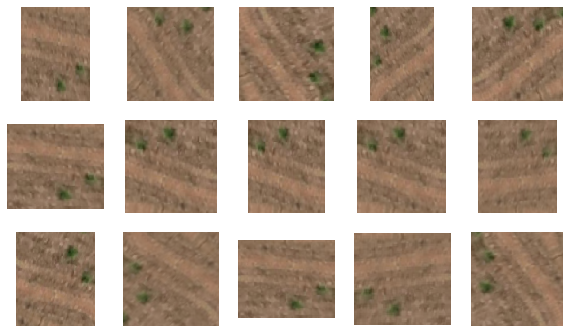

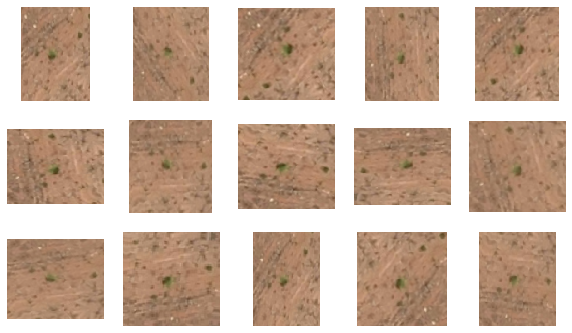

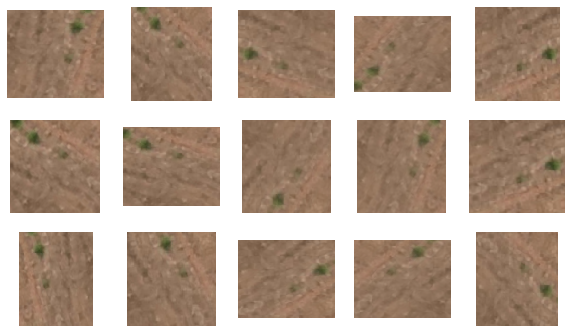

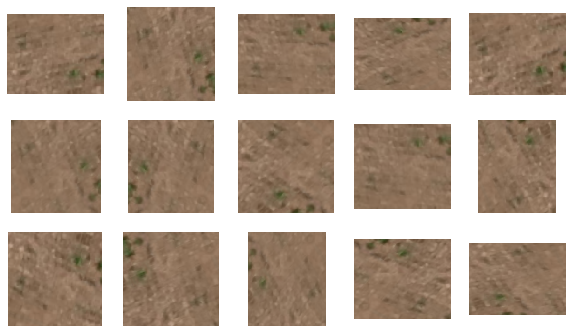

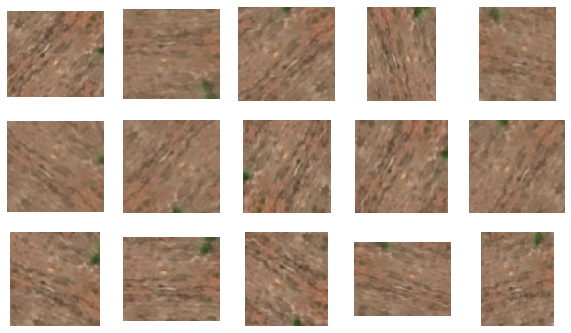

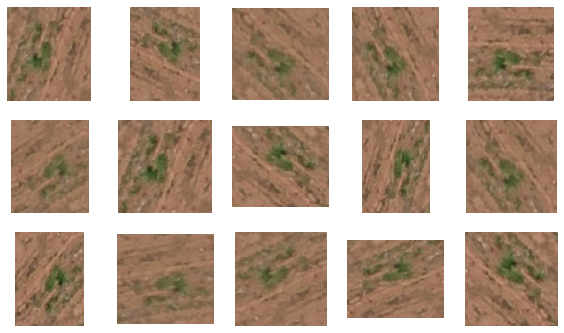

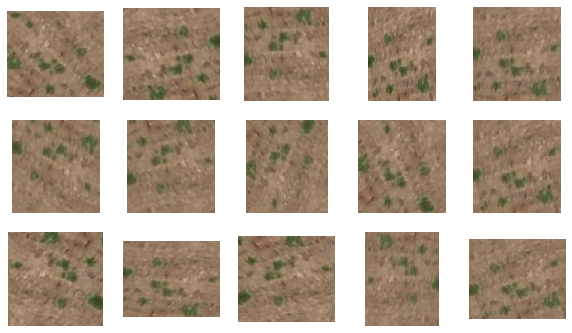

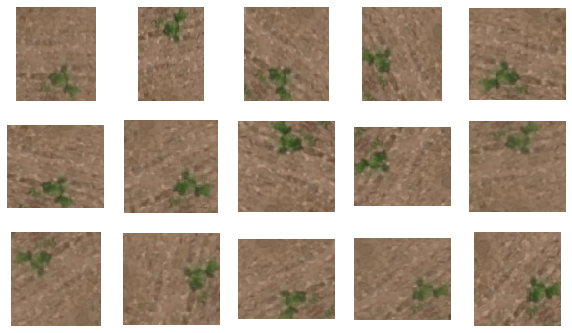

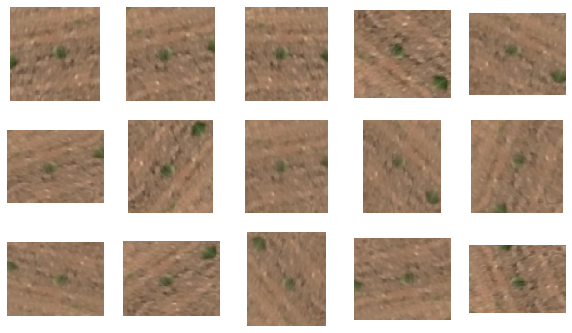

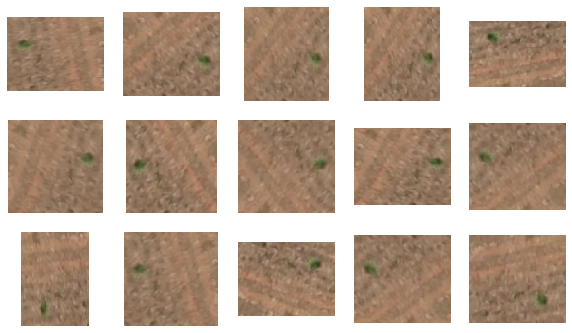

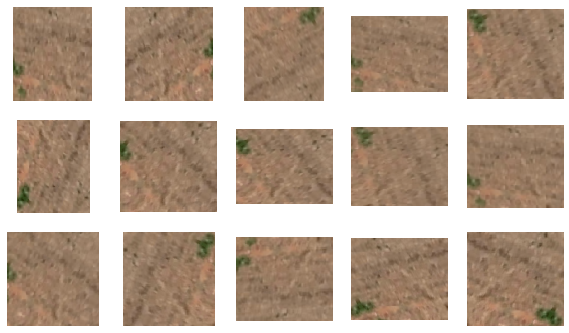

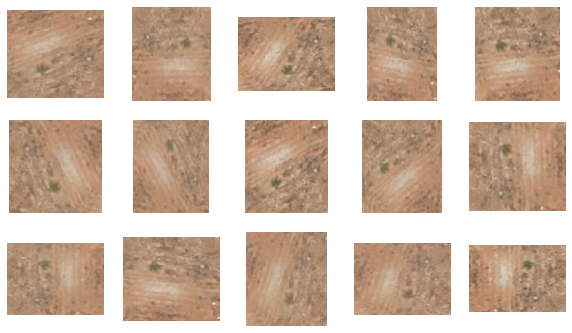

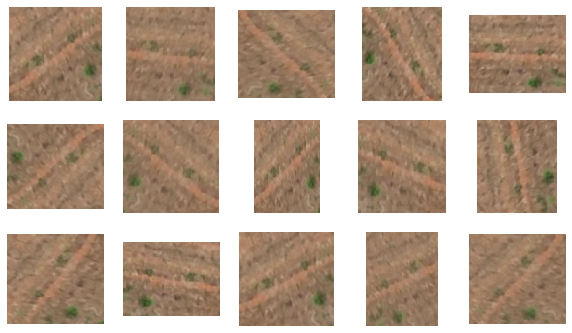

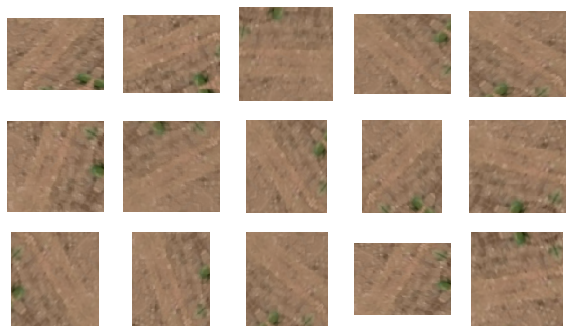

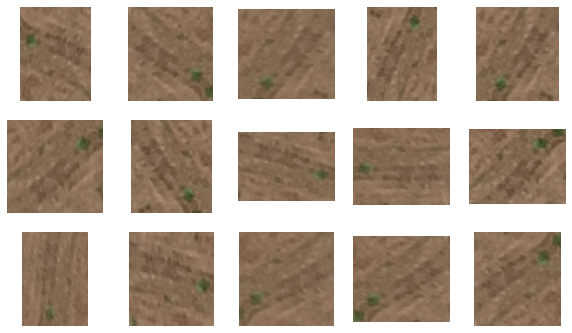

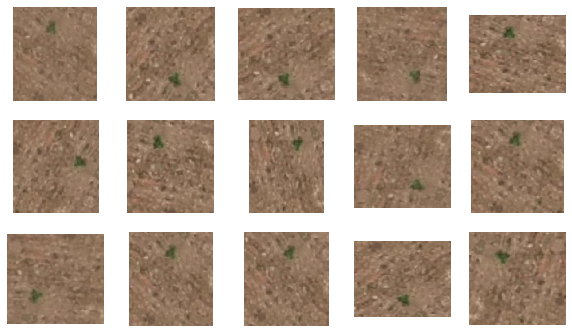

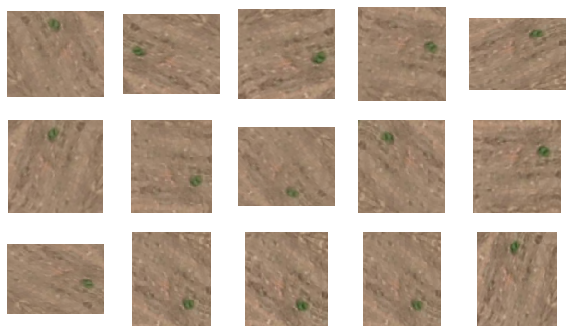

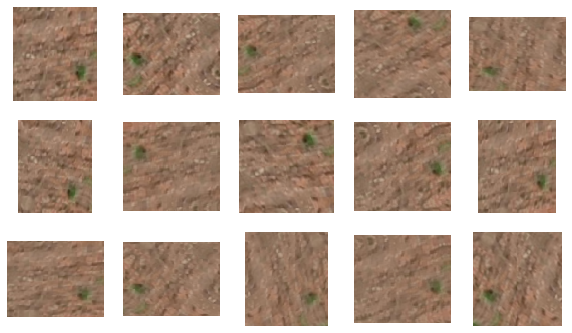

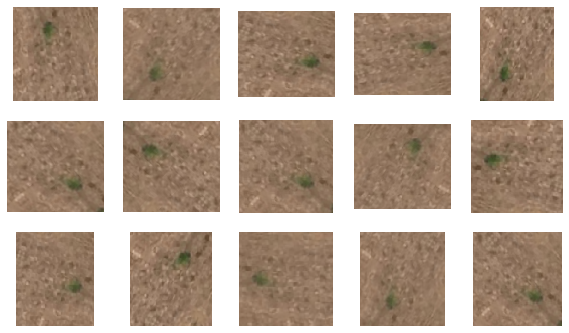

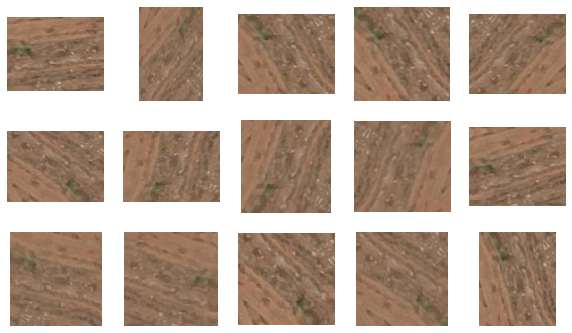

In [18]:
for m in range(20):
    plt.figure(figsize=(10, 10))
    #print("m = ", m)
    for i in range(15):
        #print("i = ", i)
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(augmented_images[m])
        plt.axis("off")
    plt.show()

In [10]:
model = Sequential()
#layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#layers.experimental.preprocessing.RandomRotation(0.2),
#layers.experimental.preprocessing.RandomContrast(factor=0.5),
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/30
6/6 [==============================] - 3s 281ms/step - loss: 1.2115 - accuracy: 0.5102 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
6/6 [==============================] - 2s 239ms/step - loss: 0.7003 - accuracy: 0.4814 - val_loss: 0.7068 - val_accuracy: 0.4688
Epoch 3/30
6/6 [==============================] - 1s 232ms/step - loss: 0.7018 - accuracy: 0.5022 - val_loss: 0.6767 - val_accuracy: 0.5938
Epoch 4/30
6/6 [==============================] - 2s 254ms/step - loss: 0.7562 - accuracy: 0.5822 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 5/30
6/6 [==============================] - 2s 260ms/step - loss: 0.6941 - accuracy: 0.4903 - val_loss: 0.6834 - val_accuracy: 0.6562
Epoch 6/30
6/6 [==============================] - 1s 220ms/step - loss: 0.6826 - accuracy: 0.5537 - val_loss: 0.7135 - val_accuracy: 0.4688
Epoch 7/30
6/6 [==============================] - 1s 212ms/step - loss: 0.7147 - accuracy: 0.4415 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 8/30
6/6 [====

In [13]:
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#print(Y_pred)

In [14]:
print("Real :       ", validation_generator.classes)
print("Prediction : ", y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Real :        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Prediction :  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0]
Confusion Matrix
[[18  3]
 [20  2]]


In [15]:
print('Classification Report')
target_names = ['daninhas', 'sem_daninhas']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    daninhas       0.47      0.86      0.61        21
sem_daninhas       0.40      0.09      0.15        22

    accuracy                           0.47        43
   macro avg       0.44      0.47      0.38        43
weighted avg       0.44      0.47      0.37        43



In [16]:
model.save("daninhas_confusion_matrix_jp.h5")

In [16]:
image_path = '../../sensix_daninhas/dataset_100x100/validation/daninha'

images = []

for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(100,100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        processed_image = np.array(img, dtype="float") / 255.0
        images.append(processed_image)

images = np.vstack(images)

count_daninha 19
count_sem_daninha 2


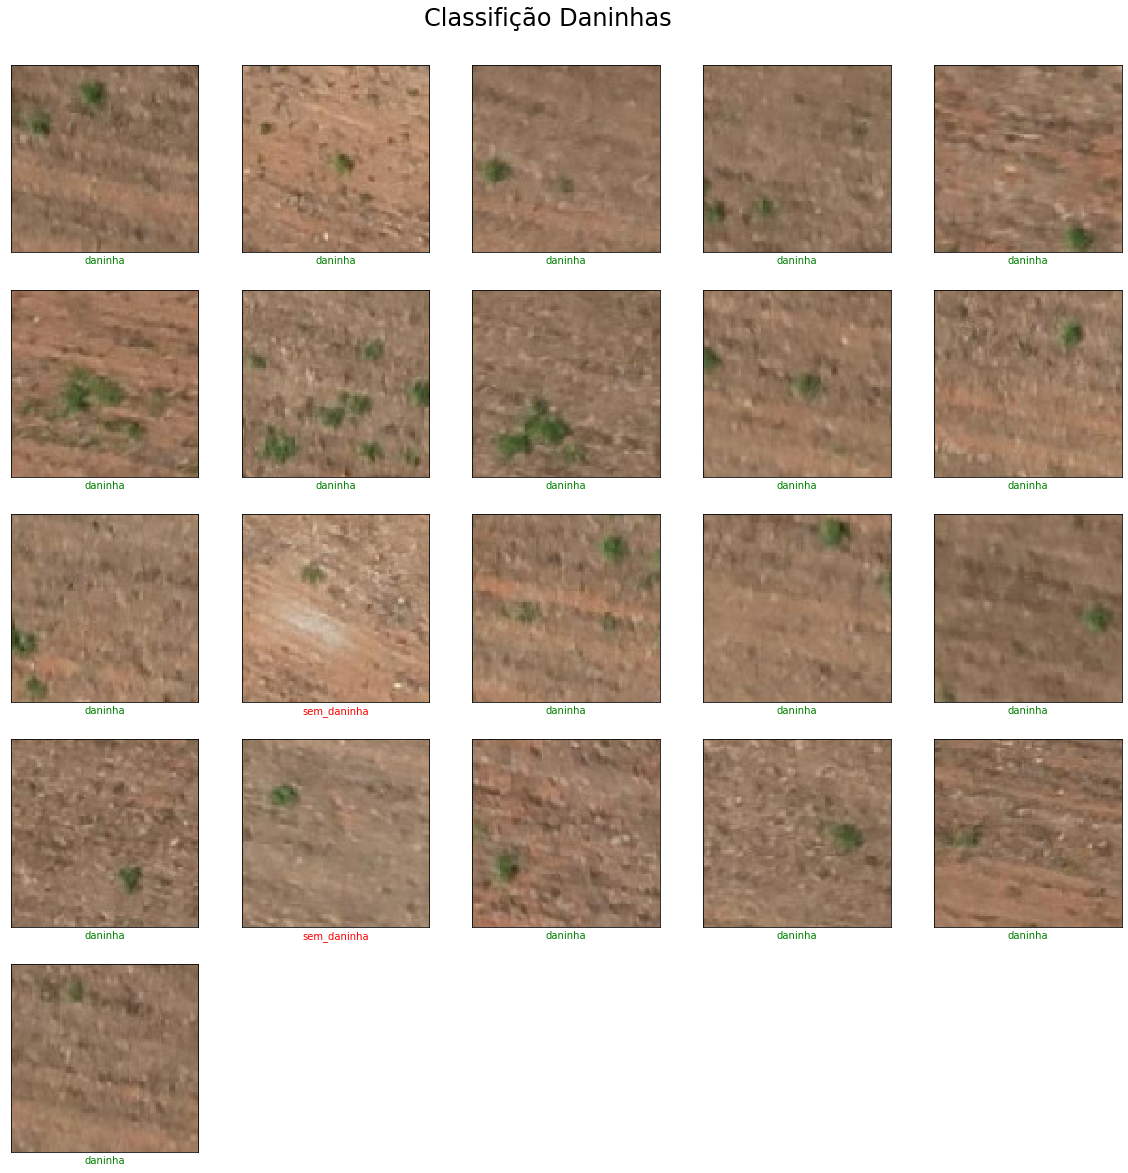

In [17]:
images_data = []
filenames = []
count_daninha = 0
count_sem_daninha = 0
count = 0

pred_result = model.predict(validation_generator, num_of_test_samples // batch_size+1)
plt.figure(figsize=(20,20))
grid_size = min(50, len(pred_result))

for filename in os.listdir(image_path):
    images_data.append(pred_result)
    filenames.append(filename)
    plt.subplot(5, 5, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count], cmap=plt.cm.binary)
    if pred_result[count][0]> pred_result[count][1]:
        legend_x = plt.xlabel("daninha")
        legend_x.set_color("green")
        count_daninha = count_daninha + 1
        if count >= num_of_test_samples -1:
            break
    else :
        legend_x = plt.xlabel("sem_daninha")
        legend_x.set_color("red")
        count_sem_daninha = count_sem_daninha + 1
    count += 1

print("count_daninha", count_daninha)
print("count_sem_daninha", count_sem_daninha)
plt.suptitle('Classifição Daninhas', y = 0.92, fontsize=24)
plt.show()
#print(pred_result)
#print(pred_result[0])
#print(pred_result[0][1])
